<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="images/book_cover.jpg" width="120">

*This notebook contains an excerpt from the [Python Programming and Numerical Methods - A Guide for Engineers and Scientists](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9), the content is also available at [Berkeley Python Numerical Methods](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html).*

*The copyright of the book belongs to Elsevier. We also have this interactive book online for a better learning experience. The code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work on [Elsevier](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9) or [Amazon](https://www.amazon.com/Python-Programming-Numerical-Methods-Scientists/dp/0128195495/ref=sr_1_1?dchild=1&keywords=Python+Programming+and+Numerical+Methods+-+A+Guide+for+Engineers+and+Scientists&qid=1604761352&sr=8-1)!*

# Solutions for Problems in Chapter 22

1. The logistics equation is a simple differential equation model that can be used to relate the change in population $\frac{dP}{dt}$ to the current population, $P$, given a growth rate, $r$, and a carrying capacity, $K$. The logistics equation can be expressed by:

 $$
\frac{dP}{dt}=rP\left(1-\frac{P}{K}\right)
$$

 Write a function $my\_logistics\_eq(t, P, r, K)$ that represents the logistics equation with a return of $dP$. Note that this format allows $my\_logistics\_eq$ to be used as an input argument to *solve_ivp*. You may assume that the arguments $dP$, $t$, $P$, $r$, and $K$ are all scalars, and $dP$ is the value $\frac{dP}{dt}$ given $r$, $P$, and $K$. Note that the input argument, $t$, is obligatory if $my\_logistics\_eq$ is to be used as an input argument to *solve_ivp*, even though it is part of the differential equation.

 Note: The logistics equation has an analytic solution defined by:
 
 $$
P(t)=\frac{KP_0e^{rt}}{K + P_0(e^{rt}-1)}
$$

 where $P_0$ is the initial population. As an exercise, you should verify that this equation is a solution to the logistics equation.

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from functools import partial
plt.style.use('seaborn-poster')

%matplotlib inline

In [3]:
 def my_logisitcs_eq(t, P, r, K):
    return r*P*(1-P/K)

dP = my_logisitcs_eq(0, 10, 1.1, 15)
dP

3.666666666666667

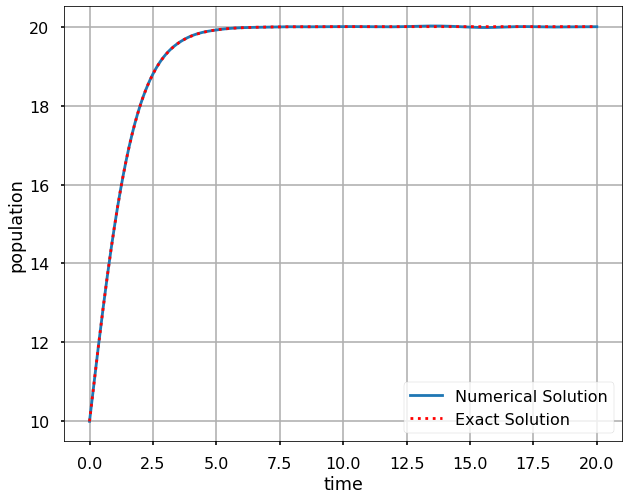

In [4]:
from functools import partial

t0 = 0
tf = 20
P0 = 10
r = 1.1
K = 20
t = np.linspace(0, 20, 2001)

f = partial(my_logisitcs_eq, r=r, K=K)
sol=solve_ivp(f,[t0,tf],[P0],t_eval=t)

plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(t, \
  K*P0*np.exp(r*t)/(K+P0*(np.exp(r*t)-1)),'r:')
plt.xlabel('time')
plt.ylabel('population')

plt.legend(['Numerical Solution', \
            'Exact Solution'])
plt.grid(True)
plt.show()

2. The Lorenz attractor is a system of ordinary differential equations that was originally developed to model convection currents in the atmosphere. The Lorenz equations can be written as:
 $$
\begin{eqnarray*}
&& \frac{dx}{dt}=\sigma (y-x)\\
&& \frac{dy}{dt} = x(\rho -z)-y\\
&& \frac{dz}{dt} = xy-\beta z
\end{eqnarray*}
$$

 where $x$, $y$, and $z$ represent position in three dimensions and $\sigma, \rho$, and $\beta$ are scalar parameters of the system. You can read more about the Lorenz attractor on Wikipedia: [Lorenz System](https://en.wikipedia.org/wiki/Lorenz_system).

 Write a function $my\_lorenz(t,S,sigma,rho,beta)$, where $t$ is a scalar denoting time, $S$ is a $(3, )$ array denoting the position $(x,y,z)$, and $sigma$, $rho$, and $beta$ are strictly positive scalars representing $\sigma, \rho$, and $\beta$. The output argument $dS$ should be the same size as $S$.

In [5]:
def my_lorenz(t, S, sigma, rho, beta):
    
    dx = sigma*(S[1] - S[0])
    dy = S[0]*(rho - S[2]) - S[1]
    dz = S[0]*S[1]-beta*S[2]
    
    dS = np.array([dx, dy, dz])
    return dS

s = np.array([1, 2, 3])
dS = my_lorenz(0, s, 10, 28, 8/3)
dS

array([10., 23., -6.])

3. Write a function $my\_lorenz\_solver(t\_span, s0, sigma, rho, beta)$ that solves the Lorenz equations using $solve\_ivp$, the function returns [T, X, Y, Z]. The input argument $t\_span$ should be a list of the form $[t0, tf]$, where $t0$ is the initial time, and $tf$ is the final time of consideration. The input argument $s0$ should be a $(3,)$ array of the form $[x0; y0; z0]$, where $(x_0, y_0, z_0)$ represents an initial position. Finally, the input arguments $sigma$, $rho$, and $beta$ are the scalar parameters $\sigma, \rho$, and $\beta$ of the Lorenz system. The output arguments $T$ should be an array of times given as the output argument of $solve\_ivp$. The output arguments, $X$, $Y$, and $Z$ should be the numerically integrated solution produced from $my\_lorenz$ in the previous problem and $solve\_ivp$. 

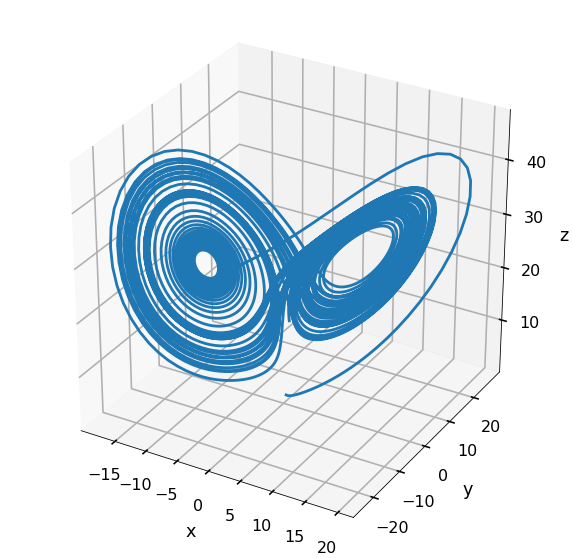

In [6]:
def my_lorenz_solver(t_span, s0, sigma, rho, beta):
    
    f = partial(my_lorenz, sigma=sigma, rho=rho, beta=beta)
    
    sol = solve_ivp(f, t_span, s0, \
            t_eval=np.arange(t_span[0], t_span[1], 0.01))
    
    T = sol.t
    X = sol.y[0]
    Y = sol.y[1]
    Z = sol.y[2]
    
    return [T, X, Y, Z]

sigma = 10
rho = 28
beta = 8/3
t0 = 0
tf = 50
s0 = np.array([0, 1, 1.05])

[T, X, Y, Z] = my_lorenz_solver([t0, tf], \
                        s0, sigma, rho, beta)

from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.plot3D(X, Y, Z)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

plt.show()

4. Consider the following model of a mass-spring-damper (MSD) system in one dimension. In this figure $m$ denotes the mass of the block, $c$ is called the damping coefficient, and $k$ is the spring stiffness. A damper is a mechanism that dissipates energy in the system by resisting velocity. The MSD system is a simplistic model of several engineering applications such as shock observers and structural systems.


 The relationship between acceleration, velocity, and displacement can be expressed by the following mass-spring-damper (MSD) differential equation:

 $$
m\ddot{x} + c\dot{x} +kx = 0
$$
 which can be rewritten:
 $$
\ddot{x}=\frac{-(c\dot{x}+kx)}{m}
$$

 Let the state of the system be denoted by the vector $S = [x; v]$ where $x$ is the displacement of the mass from its resting configuration and $v$ is its velocity. Rewrite the MSD equation as a first-order differential equation in terms of the state, $S$. In other words, rewrite the MSD equation as $dS/dt = f(t, S)$.

 Write a function $my\_msd(t, S, m, c, k)$, where $t$ is a scalar denoting time, $S$ is a $(2,)$ vector denoting the state of the MSD system, and $m$, $c$, and $k$ are the mass, damping, and stiffness coefficients of the MSD equation, respectively.


In [7]:
def my_msd(t, S, m, c, k):
    
    a = np.array([[0, 1], [-k/m, -c/m]])
    ds = np.dot(a, np.array(S))
    return ds

my_msd(0, [1, -1], 10, 1, 100)

array([-1. , -9.9])

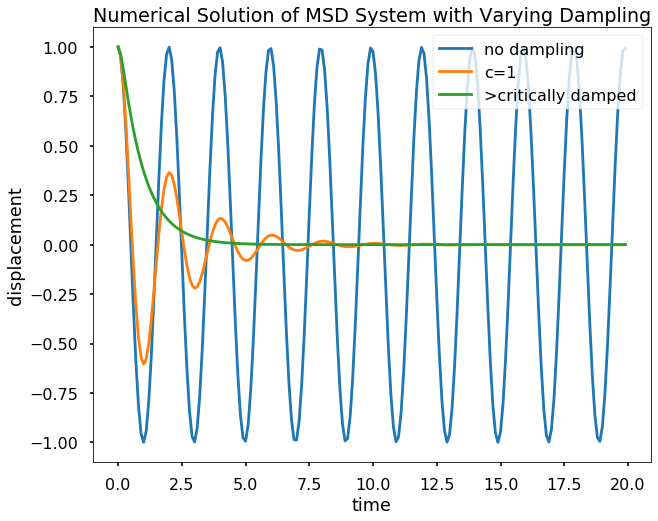

In [8]:
m = 1
k = 10
f = partial(my_msd, m=m, c=0, k=k)
t_e = np.arange(0, 20, 0.1)
sol_1=solve_ivp(f,[0,20],[1,0],t_eval=t_e)

f = partial(my_msd, m=m, c=1, k=k)
sol_2=solve_ivp(f,[0,20],[1,0],t_eval=t_e)

f = partial(my_msd, m=m, c=10, k=k)
sol_3=solve_ivp(f,[0,20],[1,0],t_eval=t_e)

plt.figure(figsize = (10, 8))
plt.plot(sol_1.t, sol_1.y[0])
plt.plot(sol_2.t, sol_2.y[0])
plt.plot(sol_3.t, sol_3.y[0])
plt.title('Numerical Solution of MSD \
System with Varying Dampling')
plt.xlabel('time')
plt.ylabel('displacement')
plt.legend(['no dampling', 'c=1', \
           '>critically damped'], loc=1)

5. Write a function $my\_forward\_euler(ds, t\_span, s0)$, where *ds* is a function object, $f(t, s)$, describing a first-order differential equation, $t\_span$ is an array of times for which numerical solutions of the differential equation are desired, and *s0* is the initial condition of the system. Assume that the size of the state is one. The output argument should be a list of [t, s], such that $t[i] = t\_span[i]$ for all $i$, and $s$ should be the integrated values of *ds* at times *t*. You should perform the integration using the Forward Euler method, $s[t_i] = s[t_{i-1}] + (t_i - t_{i-1}) ds(t_{i-1}, s[t_{i-1}])$. Note: $s[0]$ should equal $s0$.

 Test Cases:

In [9]:
def my_forward_euler(ds, t_span, s0):
    t = t_span
    # Forward Euler Method
    s = np.zeros(len(t_span))
    s[0] = s0
    for i in range(1, len(t_span)):
        s[i] = s[i-1] + (t[i] - t[i-1])*f(t[i-1], s[i-1])
    
    return [t, s]

t_span = np.linspace(0, 1, 10)
s0 = 1

# Define parameters
f = lambda t, s: t*np.exp(-s)

t_eul, s_eul = my_forward_euler(f, t_span, s0)

print(t_eul)
print(s_eul)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[1.         1.         1.00454172 1.013584   1.02702534 1.04470783
 1.06642355 1.09192262 1.12092255 1.153118  ]


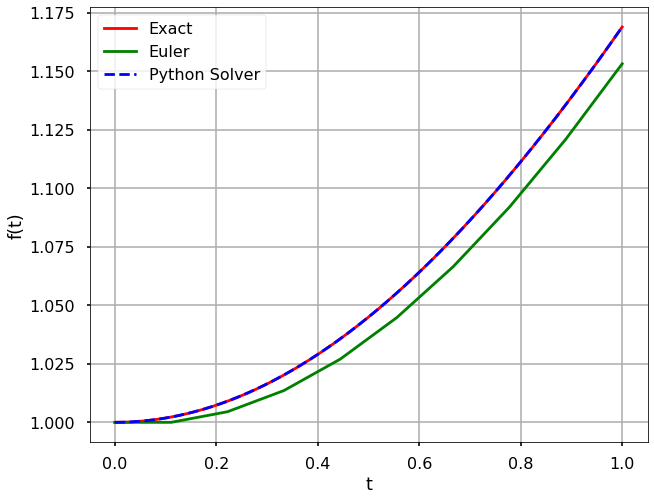

In [10]:
plt.figure(figsize = (10, 8))

# Exact solution
t = np.linspace(0, 1, 1000)
s = np.log(np.exp(s0) + (t**2-t[0])/2)
plt.plot(t, s, 'r', label='Exact')

# Forward Euler
plt.plot(t_eul, s_eul, 'g', label='Euler')

# Python solver
sol = solve_ivp(f, [0, 1], [s0], t_eval=t)
plt.plot(sol.t, sol.y[0], 'b--', \
         label='Python Solver')

plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc=2)
plt.show()

6. Write a function $myRK4(ds, t_span, s0)$, where the input and output arguments are the same as in problem 5. The function $myRK4$ should numerically integrate *ds* using the fourth-order Runge-Kutta method.

 Test Cases:

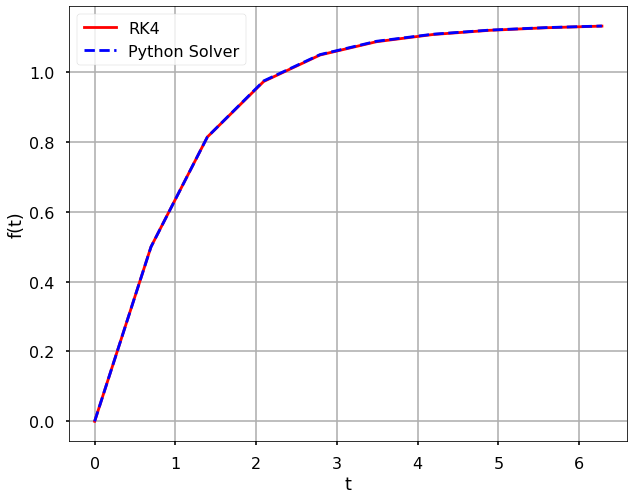

In [11]:
def myRK4(ds, t_span, s0):
    t = t_span

    s = np.zeros(len(t_span))
    s[0] = s0
    h = t[1] - t[0]
    for i in range(0, len(t_span)-1):
        k1 = f(t[i], s[i])
        k2 = f(t[i]+h/2, s[i]+k1/2*h)
        k3 = f(t[i]+h/2, s[i]+k2/2*h)
        k4 = f(t[i]+h, s[i]+k3*h)
        s[i+1] = s[i] + h/6*(k1+2*k2+2*k3+k4)
    
    return [t, s]

f = lambda t, s: np.sin(np.exp(s))/(t+1)
t_span = np.linspace(0, 2*np.pi, 10)
s0 = 0

plt.figure(figsize = (10, 8))

# Runge-Kutta method
t, s = myRK4(f, t_span, s0)
plt.plot(t, s, 'r', label='RK4')

# Python solver
sol = solve_ivp(f, [0, 2*np.pi], [s0], t_eval=t)
plt.plot(sol.t, sol.y[0], \
         'b--', label='Python Solver')

plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc=2)
plt.show()